<div class="alert alert-info">
<h1><center><font color=darkblue> CUSTOMER CHURN PREDICTION<font></center></h1>


</div>

## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Research Objectives</p>
- Yếu tố nào quan trọng nhất góp phần vào tỷ lệ giữ chân người dùng cao?
- Mô hình phân tích nào có thể dự đoán chính xác tỷ lệ nghỉ việc của khách hàng?
- Ưu điểm và nhược điểm của việc sử dụng các mô hình phân tích khác nhau là gì?
- Làm thế nào công ty viễn thông có thể sử dụng phân tích của này để xây dựng kế hoạch giữ chân người dùng ? Vì trên thực tế, việc thu hút và tạo ra 1 khách hàng mới tốn nhiều chi phí hơn so với việc giữ chân khách hàng hiện tại.


## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Data Summary</p>
- Đọc dữ liệu
- Tổng quan về cấu trúc dữ liệu
- Xử lí làm sạch dữ liệu
- Chuẩn bị dữ liệu cho các mô hình
- Tạo mô hình và đánh giá hiệu suất


In [59]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
import seaborn as sns
%matplotlib inline

In [60]:
# Đọc file dữ liệu

df = pd.read_csv("customer_churn.csv")
print(df.shape)

(7043, 21)


In [61]:
# Xuất ngẫu nhiên 5 dòng từ file dữ liệu
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5059,6907-NZZIJ,Female,0,No,No,36,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.15,3615.6,Yes
3329,5366-OBVMR,Female,0,Yes,No,18,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.30,908.75,No
4059,3415-TAILE,Female,0,Yes,Yes,2,Yes,No,DSL,No,...,No,No,Yes,Yes,Month-to-month,No,Mailed check,65.70,134.35,Yes
357,8984-EYLLL,Male,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Two year,Yes,Electronic check,105.25,6823.4,No
4568,3709-OIJEA,Male,0,No,No,26,Yes,No,Fiber optic,No,...,Yes,Yes,No,No,One year,Yes,Electronic check,85.20,2184.6,No


## <font color=RoyalBlue>Visualization<font>


Sử dụng thư viện seaborn để trực quan hoá và kiểm tra tập dữ liệu

### Explore Target variable

C:\Users\Thao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


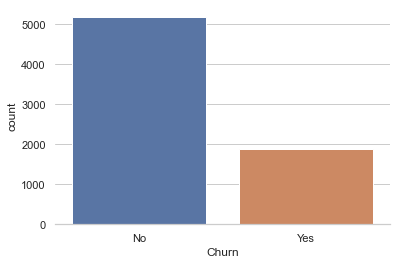

In [62]:
fig, axs = plt.subplots()
sns.set(style="white",palette="deep",color_codes=True)
sns.despine(left=True)
sns.countplot(df["Churn"]);

In [63]:
#Lấy ra các giá trị riêng biệt trong cột Churn (có Yes và No) và đếm

df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [64]:
# Tinh % ti le KH roi di

5174*100/df.shape[0] #.shape[0] la so dong

73.46301292063042

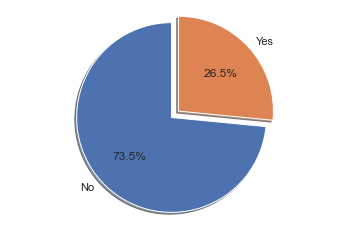

In [65]:
plt.pie(df['Churn'].value_counts(), explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90,labels=df['Churn'].unique())

plt.axis('equal');

*Từ kết quả trên, ta thấy được giá trị 'Yes' và 'No' chênh lệch nhau quá nhiều
<br>Giá trị 'No' chiếm hơn 73%<br>
**-> Mất cân bằng trong dữ liệu***

### Explore Numeric variable

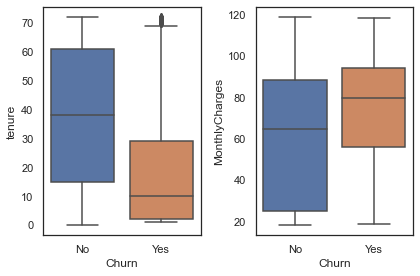

In [66]:
#Biểu đồ so sánh tỉ lệ rời đi của khách hàg ('YES','NO') khi phụ thuộc vào 'tenure' và 'MonthlyCharges'
fig, axs = plt.subplots(ncols=2)
sns.boxplot(x='Churn', y='tenure', data=df, ax=axs[0])
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axs[1])

plt.tight_layout()

### Explore Categorical variable

In [67]:
'''
this helps organize our plots and keep them in the same figure
columns: List[str] - each column is its own chart
title: str - title is used as the title of each chart
function only works for 3 or more columns
'''
def plot_categoricals(columns, title):
  fig, axs = plt.subplots(ncols=2, nrows=int(len(columns) / 2) + len(columns) % 2)
  fig.set_size_inches(15, 15)

  row = col = 0
  for column in columns:
    plot_title = '{}: {}'.format(title, column)
    sns.countplot(x=column, hue="Churn", data=df, ax=axs[row][col]).set_title(plot_title)

    if col == 1:
      col = 0
      row += 1
    else:
      col += 1

  plt.tight_layout()

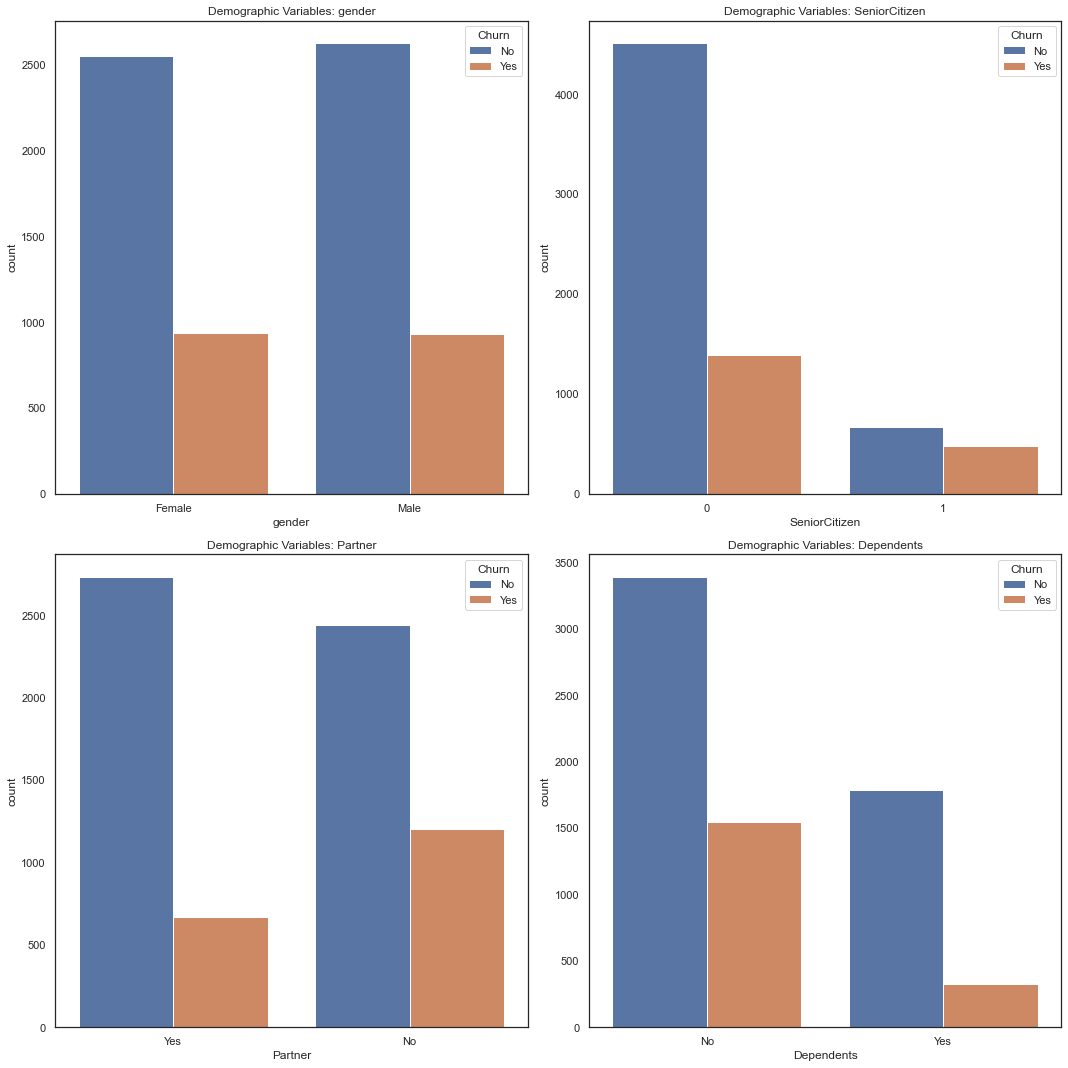

In [68]:
plot_categoricals(['gender', 'SeniorCitizen', 'Partner', 'Dependents'], 'Demographic Variables')

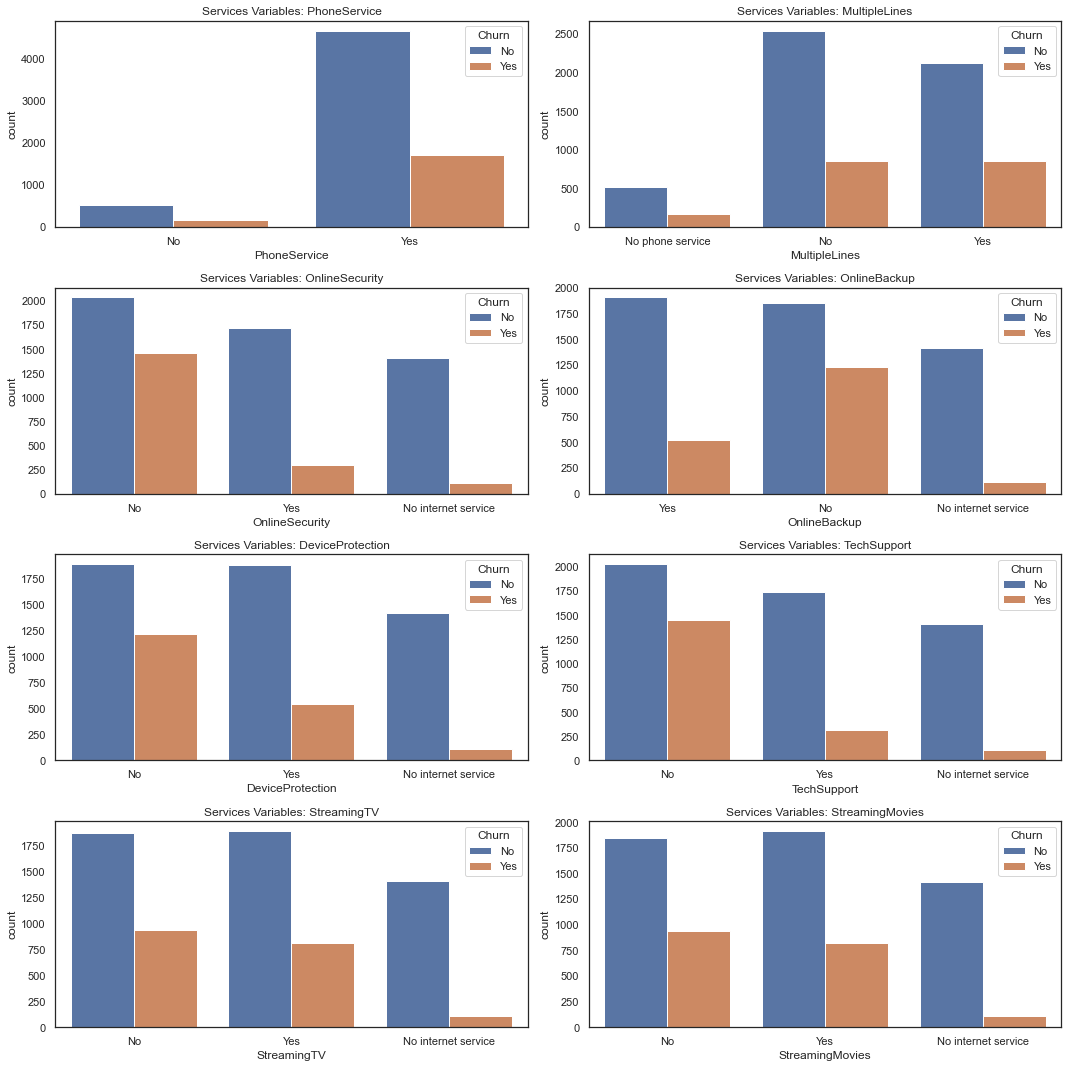

In [69]:
plot_categoricals(['PhoneService', 'MultipleLines',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV','StreamingMovies'],
                   'Services Variables')

In [70]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

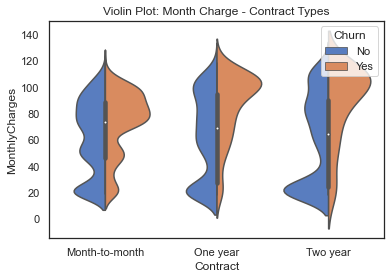

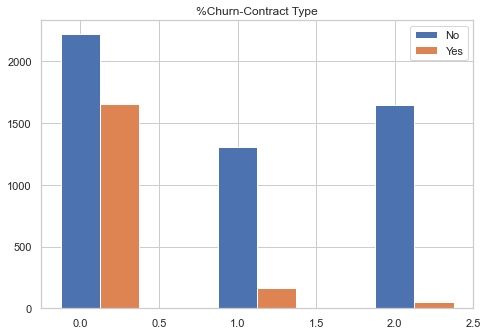

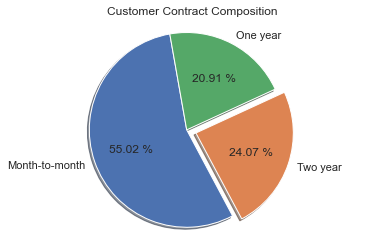

<Figure size 432x288 with 0 Axes>

In [71]:
fig, axs = plt.subplots(ncols=1)

plt.title("Violin Plot: Month Charge - Contract Types")
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="Contract", y="MonthlyCharges", hue="Churn",
                    data=df, palette="muted",split=True)


df1=df[df.Contract =='Month-to-month']
a=df1['Churn'].value_counts()
df1=df[df.Contract =='One year']
b=df1['Churn'].value_counts()
df1=df[df.Contract =='Two year']
c=df1['Churn'].value_counts()

data1=[[a.No,b.No,c.No],[a.Yes,b.Yes,c.Yes]]
x=np.arange(3)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
plt.title("%Churn-Contract Type")
ax.bar(x+0.00,data1[0],width=0.25)
ax.bar(x+0.25,data1[1],width=0.25)
ax.legend(labels=['No','Yes'])

labels='Month-to-month','Two year','One year'
sizes=[3875*100/df.shape[0],1695*100/df.shape[0],1473*100/df.shape[0]]
explode=(0,0.1,0)
figl,ax1=plt.subplots()
plt.title("Customer Contract Composition")
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.2f %%',shadow=True,startangle=100)
ax1.axis('equal')
plt.show()


plt.tight_layout()

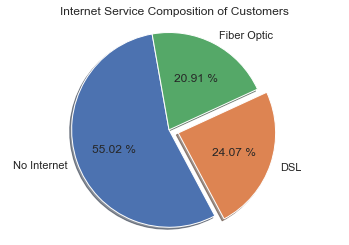

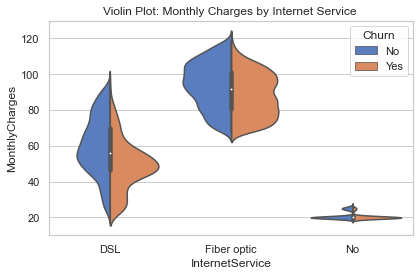

In [72]:
labels='No Internet','DSL','Fiber Optic'
sizes=[3875*100/df.shape[0],1695*100/df.shape[0],1473*100/df.shape[0]]
explode=(0,0.1,0)
figl,ax1=plt.subplots()
plt.title("Internet Service Composition of Customers")
ax1.pie(sizes,explode=explode,labels=labels,autopct='%1.2f %%',shadow=True,startangle=100)
ax1.axis('equal')
plt.show()

plt.title("Violin Plot: Monthly Charges by Internet Service ")
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x="InternetService", y="MonthlyCharges", hue="Churn",
                    data=df, palette="muted",split=True)

plt.tight_layout()

In [73]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Data preprocessing</p>

Khi mà làm mô hình dự đoán thì cột 'customerID' là vô tác dụng. Bởi vì 'customerID' là duy nhất
<br>Ví dụ, dữ liệu có 10 nghìn dòng thì sẽ có 10 nghìn customerID riêng biệt nên không thể chuyển hoá nó thành dữ liệu số được

In [74]:
# Xoá cột 'customerID'

df.drop('customerID', axis='columns', inplace=True)

In [75]:
# Xem tên của các cột và nó thuộc loại dữ liệu nào
# Mục đích là xem cột nào có dạng dữ liệu không đúng và sẽ chuyển đổi nó về dạng dữ liệu đúng mong muốn

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##### =========

Sau khi xem dạng dữ liệu của các cột, thấy được 'TotalCharges' ở dạng 'object'
<br>Nhưng trên bảng dữ liệu thì 'TotalCharges' thể hiện ở dạng số
<br>Vì vậy, chuyển kiểu dữ liệu của cột này về kiểu số

In [18]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

## <font color=RoyalBlue>Convert strings to numbers<font>

In [19]:
# 'coerce', nếu mà giá trị nào không hợp lệ thì nó sẽ thay bằng giá trị NaN
# '.isnull' là muốn kiểm tra xem có datapoint nào mang giá trị NaN không, nếu có trả về True 
# Nếu dòng có giá trị NaN ta có thể xử lí bằng cách thay thế một giá trị khác hoặc xoá nó đi
# (việc thay thế hay xoá phụ thuộc vào số lượng dòng có giá trị NaN nhiều hay ít so với dữ liệu tổng)

pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [20]:
# Đây là cách xem một cách tổng quát các dòng có cột 'TotalCharges' chứa giá trị NaN
# Giá trị NaN được thể hiện trên bảng là '' (khoảng trống)

df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [21]:
# Sau khi xoá cột 'customerID', tập dữ liệu còn 20 cột

df.shape

(7043, 20)

In [76]:
# '.iloc[]' cho phép truy xuất 1 giá trị cụ thể thuộc 1 hàng hoặc 1 cột của tập dữ liệu 
# Ở đây, ta truy xuất dữ liệu dòng 488 và cột 'TotalCharges'

df.iloc[488].TotalCharges

' '

In [23]:
# Dữ liệu gồm các dòng có 'TotalCharges' khác rỗng là bao nhiêu?
# Vậy ta có 11 dòng có 'TotalCharges' chứa giá trị rỗng

df[df.TotalCharges!=' '].shape

(7032, 20)

## <font color=RoyalBlue>Remove rows with space in TotalCharges<font>

In [24]:
# Vì chỉ có 11 dòng chứa giá trị NaN, chứa một phần nhỏ trong tập dữ liệu nên ta sẽ xoá 11 dòng đó luôn
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [25]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [26]:
# Đổi kiểu 'TotalCharges' về kiểu số - numeric và lưu vào dataframe mới
 
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Thao\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [28]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [29]:
# In ra các cột dữ liệu (có kiểu 'object') và xem nó chứa các datapoint như thế nào
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [30]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## <font color=RoyalBlue>Replace<font>

In [31]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Thao\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [32]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## <font color=RoyalBlue>Convert Yes and No to 1 or 0<font>

In [33]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No':0}, inplace=True)

C:\Users\Thao\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [34]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [35]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [36]:
df1.gender.unique()

array([1, 0], dtype=int64)

## <font color=RoyalBlue>One hot encoding for categorical columns<font>

In [37]:
# dùng '.get_dummies' để tạo các biến giả, các biến chỉ số và lưu về dataframe mới
# ví dụ, cột'InternetService' có 3 giá trị unique. Sau khi dùng '.get_dummies' sẽ cho ra 3 cột mới tương ứng với 3 giá trị unique đó

df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [38]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5582,1,0,0,0,48,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6840,0,0,0,1,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1503,1,1,0,0,45,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
6808,0,0,0,0,39,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3467,0,1,0,0,5,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [39]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

## <font color=RoyalBlue>Check correlation<font>

Kiểm tra các biến tính năng tương quan với nhau và với biến mục tiêu 'Churn' bằng hệ số tương quan.

In [40]:
corr=df2.corr()
corr.style.background_gradient(cmap='cividis').set_precision(2)

C:\Users\Thao\AppData\Local\Temp/ipykernel_18700/3885408988.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='cividis').set_precision(2)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.00,0.00,0.00,-0.01,-0.01,0.01,0.01,0.02,0.01,0.00,0.01,0.01,0.01,0.01,0.01,-0.00,0.01,-0.01,0.01,-0.00,0.00,-0.01,0.00,0.02,-0.00,-0.00,-0.01
SeniorCitizen,0.00,1.00,0.02,-0.21,0.02,0.01,0.14,-0.04,0.07,0.06,-0.06,0.11,0.12,0.16,0.22,0.10,0.15,-0.11,0.25,-0.18,0.14,-0.05,-0.12,-0.02,-0.02,0.17,-0.15
Partner,0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.14,0.14,0.15,0.12,0.12,0.12,-0.01,0.10,0.32,-0.15,-0.00,0.00,-0.00,-0.28,0.08,0.25,0.11,0.08,-0.08,-0.10
Dependents,-0.01,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.08,0.02,0.01,0.06,-0.02,-0.04,-0.11,-0.11,0.06,-0.16,0.05,-0.16,0.14,-0.23,0.07,0.20,0.05,0.06,-0.15,0.06
tenure,-0.01,0.02,0.38,0.16,1.00,0.01,0.33,0.33,0.36,0.36,0.33,0.28,0.29,0.00,0.25,0.83,-0.35,0.01,0.02,-0.04,-0.65,0.20,0.56,0.24,0.23,-0.21,-0.23
PhoneService,0.01,0.01,0.02,-0.00,0.01,1.00,0.28,-0.09,-0.05,-0.07,-0.10,-0.02,-0.03,0.02,0.25,0.11,0.01,-0.45,0.29,0.17,-0.00,-0.00,0.00,0.01,-0.01,0.00,-0.00
MultipleLines,0.01,0.14,0.14,-0.02,0.33,0.28,1.00,0.10,0.20,0.20,0.10,0.26,0.26,0.16,0.49,0.47,0.04,-0.20,0.37,-0.21,-0.09,-0.00,0.11,0.08,0.06,0.08,-0.23
OnlineSecurity,0.02,-0.04,0.14,0.08,0.33,-0.09,0.10,1.00,0.28,0.27,0.35,0.18,0.19,-0.00,0.30,0.41,-0.17,0.32,-0.03,-0.33,-0.25,0.10,0.19,0.09,0.12,-0.11,-0.08
OnlineBackup,0.01,0.07,0.14,0.02,0.36,-0.05,0.20,0.28,1.00,0.30,0.29,0.28,0.27,0.13,0.44,0.51,-0.08,0.16,0.17,-0.38,-0.16,0.08,0.11,0.09,0.09,-0.00,-0.17
DeviceProtection,0.00,0.06,0.15,0.01,0.36,-0.07,0.20,0.27,0.30,1.00,0.33,0.39,0.40,0.10,0.48,0.52,-0.07,0.15,0.18,-0.38,-0.23,0.10,0.17,0.08,0.11,-0.00,-0.19


<br>Từ bảng trên, có một số nhận xét như sau:
- 'Churn' và 'tenure' có hệ số tương quan là -0.35, điều này có nghĩa là biến 'tenure'- số tháng khách hàng gắn bó với công ty càng thấp thì tỉ lệ khách hàng rời đi càng cao.
- 'TotalCharges' và 'tenure' có mối tương quan cao 0.83, 'Contract_type' và 'tenure' có mối tương quan từ -0.65 đến 0.56.
   Nghĩa là, khi mà 'contract' càng kéo dài thì 'TotalCharges' càng tăng
- Ta thấy được, mối tương quan giữa các loại 'Internet', 'PhoneService' và 'MonthlyCharges', 'TotalCharges' tương đối cao. Nghĩa là khi các thiết bị có giá cao thì dẫn tới 'MonthlyChargé' tăng, 'TotalCharges' tăng.
- Có thể thấy được là có một biến không có mối tương quan với bất kì biến nào khác: 'gender'

In [41]:
df2.corr()['Churn'].sort_values()

tenure                                    -0.354049
Contract_Two year                         -0.301552
InternetService_No                        -0.227578
TotalCharges                              -0.199484
Contract_One year                         -0.178225
OnlineSecurity                            -0.171270
TechSupport                               -0.164716
Dependents                                -0.163128
Partner                                   -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup                              -0.082307
DeviceProtection                          -0.066193
gender                                     0.008545
PhoneService                               0.011691
MultipleLines                              0.040033
StreamingMovies                            0.060860
StreamingTV 

Việc theo dõi từ Hệ số tương quan chỉ cho mình phỏng đoán trước giữa hai biến có mối quan hệ với nhau hay không và mối quan hệ đó là âm hay dương.

Để xác định chính xác chúng có mối tương quan với nhau hay không thì cần phải tính ra p-value (sig) nếu nhỏ hơn mức ý nghĩa (significance level) 5% thì có tương quan và ngược lại thì không có tương quan giữa 2 biến so sánh.

In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Change variable name separators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in df2.columns]

#Effect the change to the dataframe column names
df2.columns = all_columns

#Prepare it for the GLM formula
glm_columns = [e for e in all_columns if e not in ['customerID', 'Churn']]
glm_columns = ' + '.join(map(str, glm_columns))

#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data=df2, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                            GLM   Df Residuals:                     7008
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2913.1
Date:                Wed, 22 Jun 2022   Deviance:                       5826.3
Time:                        11:48:02   Pearson chi2:                 8.03e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [43]:
print('Sau khi kiểm tra cẩn thận ý nghĩa của từng biến và chỉ giữ những biến có giá trị p nhỏ hơn 0,05:')
p_value = round(res.pvalues[res.pvalues<0.05],4)
p_value

Sau khi kiểm tra cẩn thận ý nghĩa của từng biến và chỉ giữ những biến có giá trị p nhỏ hơn 0,05:


SeniorCitizen                     0.0103
tenure                            0.0000
MultipleLines                     0.0114
PaperlessBilling                  0.0000
TotalCharges                      0.0000
InternetService_Fiber_optic       0.0482
InternetService_No                0.0109
Contract_Month_to_month           0.0000
Contract_Two_year                 0.0013
PaymentMethod_Electronic_check    0.0053
dtype: float64

Có:<br>
Churn = 0.2168xSeniorCitizen - 0.0606xtenure + 0.4484xMultipleLines + 0.3424xPaperlessBilling + 0.0003xTotalCharges + 1.8470xInternetService_Fiber_optic - 1.6868xInternetService_No + 0.7592xContract_Month_to_month - 0.5979xContract_Two_year - 0.0324xPaymentMethod_Electronic_check 

Phương trình này cho chúng ta thấy rằng nếu khách hàng là người cao tuổi, sử dụng MultipleLines, sử dụng dịch vụ internet cáp quang, sử dụng thanh toán điện tử, sử dụng séc điện tử làm phương thức thanh toán, thì họ có nhiều khả năng bỏ rời đi hơn.

## <font color=RoyalBlue>MinMaxScaler<font>
Ta thấy, các cột 'tenure', 'MonthlyCharges', 'TotalCharges' chứa các giá trị khá lớn so với tập dữ liệu, không phù hợp để xây dựng mô hình.
<br> Để diễn giải hiệu ứng trong hồi quy logistic, chúng ta bị ràng buộc trong phạm vi từ 0 đến 1. 
<br>Ta sẽ dùng 'MinMaxScaler', cho min=0, max=1 để cho nó phù hợp với tập dữ liệu.
<br> ví dụ, cột 'MonthlyCharges' chạy từ 0-100 thì sau khi dùng 'MinMaxScaler' thì 100 thành 1, 50 thành 0.5 ...


In [44]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [45]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Building the Model</p>

<br>Mục tiêu của học có giám sát là xây dựng mô hình hoạt động tốt trên dữ liệu mới (unseen data).
<br>Vậy dữ liệu đầu vào như thế nào để có được một mô hình hoạt động tốt ?

## <font color=RoyalBlue>Oversampling<font>

Xử lí dữ liệu mất cân bằng để cho hiệu suất mô hình đạt kết quả cao hơn.
<br>Tại vì khi mà dữ liệu không cân bằng, mô hình có thiên hướng dự đoán ra lớp đa số để tăng chỉ số accuracy, khi đó chỉ số accuracy không còn tác dụng đánh giá nữa.

In [46]:
count_class_0,count_class_1=df1.Churn.value_counts()
count_class_0,count_class_1

(5163, 1869)

In [47]:
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]
df_class_1.Churn.value_counts()

1    1869
Name: Churn, dtype: int64

In [48]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

print('Random over-sampling: ')
print(df_test_over.Churn.value_counts())

Random over-sampling: 
0    5163
1    5163
Name: Churn, dtype: int64


## <font color=RoyalBlue>Train-Test-Split<font>


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

Đầu tiên, phải tách tập dữ liệu đầy đủ của mình thành các giá trị **input** và **output**:
<br>**X** là các giá trị input, gồm các biến độc lập phục vụ cho việc dự đoán biến mục tiêu (X là 1 lưới dữ liệu 2 chiều, trong đó, các hàng đại diện cho các mẫu, các cột đại diện cho các tính năng)
<br>**y** là giá trị output, là biến mục tiêu mình vừa nhắc đến, là những gì ta muốn dự đoán từ dữ liệu.
<br><br>Vậy ở đây, biến mục tiêu của mình là biến 'churn' trong tập dữ liệu -> dự đoán tỉ lệ rời đi của khách hàng trên thang đo 'YES' hoặc 'NO'

In [50]:
X = df_test_over.drop('Churn',axis='columns')
y = testLabels = df_test_over.Churn.astype(np.float32) #.astype: ép kiểu dữ liệu về float32

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

Chia tập dữ liệu thành 2 phần: tập train (tập huấn luyện) và tập test (tập thử nghiệm)
<br>với test_size=0.2, nghĩa là chia 80% là đào tạo và 20% là thử nghiệm

plt.plot(X, y, 'ro')

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [51]:
y_train.value_counts()

1.0    4130
0.0    4130
Name: Churn, dtype: int64

In [52]:
y_test.value_counts()

1.0    1033
0.0    1033
Name: Churn, dtype: int64

## <font color=RoyalBlue>Logistic regression<font>

In [53]:
#logistic Model
model = LogisticRegression()

def log_reg(X_train, y_train, X_test, y_test):   
    #Xây dựng mô hình từ tập dữ liệu train
    model.fit(X_train, y_train)
    
    #Kết quả dự đoán trên dữ liệu từ tập test
    y_pred = model.predict(X_test)
    print("preds",y_pred[:10],"\n")

#.score() trả về hệ số xác định, hoặc R2 cho dữ liệu được truyền.
#Giá trị tối đa của R2 là 1, giá trị R2 càng cao thì càng phù hợp.
    acc = model.score(X_test,y_test)
    print("Accuracy with Logistic Regression:",acc,"\n")

    cl_rep = classification_report(y_test,y_pred)
    print(cl_rep)
        

In [54]:
log_reg(X_train, y_train, X_test, y_test)

preds [1. 0. 0. 1. 0. 0. 1. 1. 1. 1.] 

Accuracy with Logistic Regression: 0.760406582768635 

              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      1033
         1.0       0.74      0.80      0.77      1033

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



## <font color=RoyalBlue>Random Forest Performance<font>

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
#Create a Gaussian Classifier

model=RandomForestClassifier(n_estimators=100)

#Xây dựng mô hình từ tập dữ liệu train
model.fit(X_train, y_train)
#Kết quả dự đoán trên dữ liệu từ tập test
y_pred = model.predict(X_test)
print("preds",y_pred[:10],"\n")

#.score() trả về hệ số xác định, hoặc R2 cho dữ liệu được truyền. Giá trị tối đa của R2 là 1, giá trị R2 càng cao thì càng phù hợp.
acc = model.score(X_test,y_test)
print("Accuracy with Random Forest Classifier:",acc,"\n")
cl_rep = classification_report(y_test,y_pred)
print(cl_rep)
        

preds [1. 0. 1. 1. 0. 0. 1. 1. 1. 1.] 

Accuracy with Random Forest Classifier: 0.898838334946757 

              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89      1033
         1.0       0.86      0.95      0.90      1033

    accuracy                           0.90      2066
   macro avg       0.90      0.90      0.90      2066
weighted avg       0.90      0.90      0.90      2066



**Có thể thấy, sau khi xây dựng mô hình bằng hai cách trên, thì mô hình được xây dựng dùng RandomForest cho kết quả tốt hơn.**

## <font color=RoyalBlue>Feature Important<font>

Sau khi đánh giá độ chính xác của mô hình, vậy thì tham số đầu vào nào đóng vai trò quan trọng nhất trong việc xác định dự đoán của chúng ta ?

In [56]:
feature_imp = pd.Series(model.feature_importances_,index = X_train.columns).sort_values(ascending=False)
feature_imp

TotalCharges                               0.170256
MonthlyCharges                             0.158801
tenure                                     0.153194
Contract_Month_to_month                    0.082005
Contract_Two_year                          0.048858
InternetService_Fiber_optic                0.042561
PaymentMethod_Electronic_check             0.028328
gender                                     0.025239
OnlineSecurity                             0.023661
PaperlessBilling                           0.023363
Partner                                    0.021422
OnlineBackup                               0.019724
TechSupport                                0.019386
Dependents                                 0.018248
MultipleLines                              0.018219
SeniorCitizen                              0.017275
StreamingMovies                            0.016396
DeviceProtection                           0.016041
StreamingTV                                0.015795
Contract_One

No handles with labels found to put in legend.


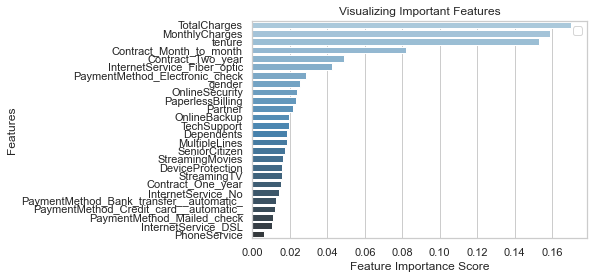

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index,palette="Blues_d")
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

**Từ những điều trên, chúng ta có thể thấy rằng 'TotalCharges' đóng một vai trò quan trọng hơn trong việc xác định việc phân loại một khách hàng có rời đi hay không**
<br> Random Forrest Algorithm Cung cấp một chỉ số để lựa chọn tính năng tốt, cho thấy tầm quan trọng tương đối hoặc đóng góp của từng tính năng trong dự đoán. Nó tự động tính điểm mức độ phù hợp của từng tính năng trong giai đoạn đào tạo. Sau đó, nó chia tỷ lệ mức độ liên quan xuống để tổng của tất cả các điểm là 1.


## <p style="background-color:#9c2162; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">Conclusion</p>
- Tỉ lệ Churn là một chỉ số quan trọng cho các doanh nghiệp. Xác định những khách hàng không hài lòng có thể giúp các nhà quản lí xác định kế hoạch sản phẩm hoặc định giá, xử lí các vấn đề cũng như đáp ứng nhu cầu và sở thích của khách hàng. Khi đó, sẽ dễ dàng chủ động hơn trong việc giảm tỉ lệ Churn.
- Hiệu suất của cả hai mô hình được đánh giá bằng các thước đo hiệu suất khác nhau. Kết quả cho thấy rằng bằng mọi phép đo, cả hai loại mô hình này đều cho ra hiệu suất tương đối tốt.
- Mô hình hồi quy Logistic, độ chính xác là 80%, còn mô hình dùng Random Forrest Algorithm là 78.8%
    Sau khi xử lý mất cân bằng dữ liệu thì độ chính xác của Random Forrest Algorithm cao hơn Logit với 90% trong khi mô hình hồi quy logistis độ chính xác 77%. <br>
    -> Vậy mô hình RandomFrorest cho kết quả mô hình với hiệu suất cao hơn.
- Mô hình hồi quy Logistic đã phân loại chính xác rằng có 1033 khách hàng sẽ không rời đi và không chính xác dự đoán rằng 374 khách hàng sẽ rời rời đi. Với mô hình dùng Random Forrest Algorithm cũng cho kết quả tương tự.
- Giải pháp đề ra sau khi dự đoán: Khách hàng ở lại với công ty lâu, chọn hoàn toàn không sử dụng dịch vụ internet, chọn hợp đồng một năm hoặc hai năm thay vì tùy chọn tháng này sang tháng khác và công ty đưa ra mức giá rẻ hơn, thì họ ít có khả năng rời đi.